#Reading the data and analysing them



In [5]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv("/content/Marketing Analytics (1).csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2027 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [22]:
mean=data['Income'].mean()
data['Income']=data['Income'].fillna(mean)        #filled the null values

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Income                2205 non-null   float64 
 1   Kidhome               2205 non-null   int64   
 2   Teenhome              2205 non-null   int64   
 3   Recency               2205 non-null   int64   
 4   MntWines              2205 non-null   int64   
 5   MntFruits             2205 non-null   int64   
 6   MntMeatProducts       2205 non-null   int64   
 7   MntFishProducts       2205 non-null   int64   
 8   MntSweetProducts      2205 non-null   int64   
 9   MntGoldProds          2205 non-null   int64   
 10  NumDealsPurchases     2205 non-null   int64   
 11  NumWebPurchases       2205 non-null   int64   
 12  NumCatalogPurchases   2205 non-null   int64   
 13  NumStorePurchases     2205 non-null   int64   
 14  NumWebVisitsMonth     2205 non-null   int64   
 15  Acce

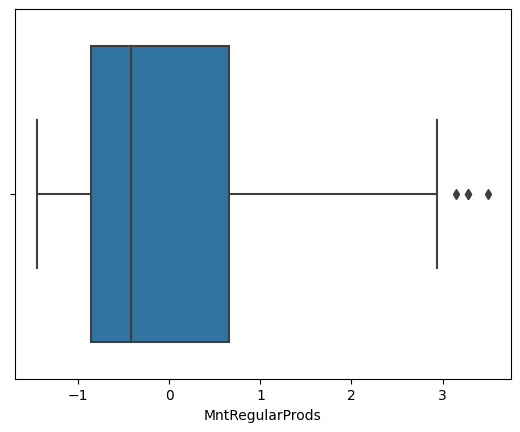

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=data['MntRegularProds'])
plt.show()       #to check outliers(values that are outside the range)

In [25]:
#removing outliers

col = 'MntRegularProds'


if col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]



In [26]:
#normalization
#min-max scaling
from sklearn.preprocessing import MinMaxScaler
c='MntRegularProds'
scaler=MinMaxScaler()
data[c]=scaler.fit_transform(data[[c]])        # mathematicially we can solve by x-xmin/xmax-xmin
print(data[c])

0       0.628968
1       0.108719
2       0.355710
3       0.118935
4       0.246260
          ...   
2200    0.412258
2201    0.259394
2202    0.538490
2203    0.366290
2204    0.150675
Name: MntRegularProds, Length: 2205, dtype: float64


In [27]:
#zscore ---> tell how many standard deviations belowe or above the popualtion mean
from sklearn.preprocessing import StandardScaler
column_name = 'MntRegularProds'
scaler = StandardScaler()
data[column_name] = scaler.fit_transform(data[[column_name]])
print(data[column_name])

0       1.665625
1      -0.909676
2       0.312960
3      -0.859109
4      -0.228829
          ...   
2200    0.592884
2201   -0.163814
2202    1.217746
2203    0.365333
2204   -0.701991
Name: MntRegularProds, Length: 2205, dtype: float64


In [28]:
#Binning
data['Inc_cat']=pd.cut(data['Income'],bins=[0,10000,30000,45000,60000,1000000],labels=['Very LOW','Low','Mid ','High','Very High'],ordered=False) #Pandas cut() function is used to separate the array elements into different bins
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Inc_cat
0,51688.25407,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1.665625,0,High
1,46344.00000,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,-0.909676,0,High
2,71613.00000,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,0.312960,0,Very High
3,26646.00000,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,-0.859109,0,Low
4,58293.00000,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,-0.228829,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.00000,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,0.592884,0,Very High
2201,64014.00000,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,-0.163814,1,Very High
2202,56981.00000,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1.217746,1,High
2203,69245.00000,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,0.365333,0,Very High


In [29]:
#One-hot encoding
pd.get_dummies(data, prefix=['MntGoldProds'])

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,MntGoldProds_Very LOW,MntGoldProds_Low,MntGoldProds_Mid,MntGoldProds_High,MntGoldProds_Very High
0,51688.25407,0,0,58,635,88,546,172,88,88,...,0,0,1529,1.665625,0,0,0,0,1,0
1,46344.00000,1,1,38,11,1,6,2,1,6,...,0,0,21,-0.909676,0,0,0,0,1,0
2,71613.00000,0,0,26,426,49,127,111,21,42,...,0,0,734,0.312960,0,0,0,0,0,1
3,26646.00000,1,0,26,11,4,20,10,3,5,...,0,0,48,-0.859109,0,0,1,0,0,0
4,58293.00000,1,0,94,173,43,118,46,27,15,...,0,1,407,-0.228829,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.00000,0,1,46,709,43,182,42,118,247,...,0,0,1094,0.592884,0,0,0,0,0,1
2201,64014.00000,2,1,56,406,0,30,0,0,8,...,0,1,436,-0.163814,1,0,0,0,0,1
2202,56981.00000,0,0,91,908,48,217,32,12,24,...,0,0,1217,1.217746,1,0,0,0,1,0
2203,69245.00000,0,1,8,428,30,214,80,30,61,...,1,0,782,0.365333,0,0,0,0,0,1


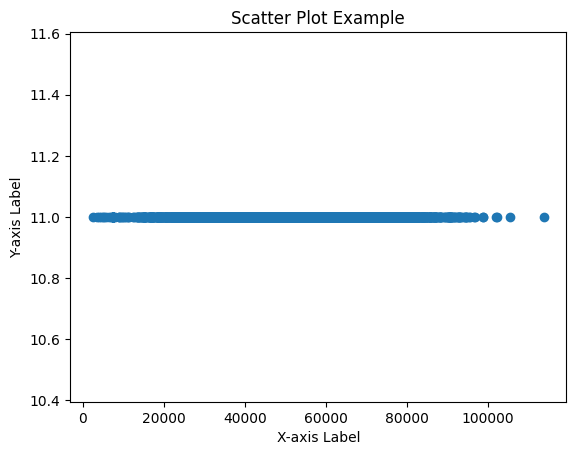

In [30]:
#scatter plt
import matplotlib.pyplot as plt

x = data['Income']
y = data['Z_Revenue']


plt.scatter(x, y)


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

plt.show()
#here income and revenue have strong relationship because they are not very scattered.

<Axes: xlabel='Income', ylabel='Z_Revenue'>

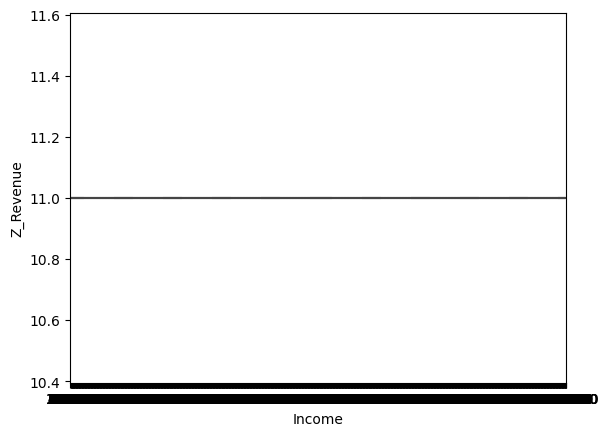

In [31]:
sns.violinplot(x="Income", y="Z_Revenue", data=data) #violine plt here the values are not vey dense(broader) thats the reason there is no broader area

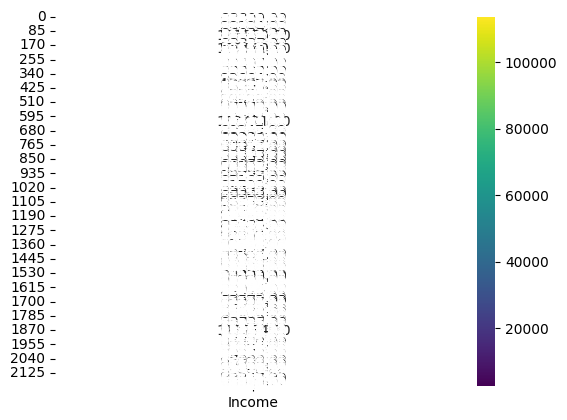

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
income_data = data['Income']

# Create a heatmap using the 'Income' column as the colormap
sns.heatmap(income_data.to_frame(), cmap='viridis', annot=True, fmt='.2f', linewidths=.5)

# Show the plot
plt.show()


In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
marital_data = data[['marital_Divorced', 'marital_Single', 'marital_Widow', 'marital_Together', 'marital_Married']]
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns]
scaler = StandardScaler()
numeric_data_standardized = scaler.fit_transform(numeric_data)
combined_data = pd.concat([marital_data, pd.DataFrame(numeric_data_standardized, columns=numeric_data.columns)], axis=1)
num_components = 1
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(combined_data)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1'])
result_df = pd.concat([data, df_pca], axis=1)
print(result_df)

           Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     51688.25407        0         0       58       635         88   
1     46344.00000        1         1       38        11          1   
2     71613.00000        0         0       26       426         49   
3     26646.00000        1         0       26        11          4   
4     58293.00000        1         0       94       173         43   
...           ...      ...       ...      ...       ...        ...   
2200  61223.00000        0         1       46       709         43   
2201  64014.00000        2         1       56       406          0   
2202  56981.00000        0         0       91       908         48   
2203  69245.00000        0         1        8       428         30   
2204  52869.00000        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1

In [45]:
edu_data = data[['education_2n Cycle', 'education_Graduation', 'education_Basic', 'education_Master', 'education_PhD']]
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns]
scaler = StandardScaler()
numeric_data_standardized = scaler.fit_transform(numeric_data)
combined_data = pd.concat([edu_data, pd.DataFrame(numeric_data_standardized, columns=numeric_data.columns)], axis=1)
num_components = 1
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(combined_data)
df_pca = pd.DataFrame(data=df_pca, columns=['PC2'])
resut_df = pd.concat([result_df, df_pca], axis=1)
print(resut_df)

           Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     51688.25407        0         0       58       635         88   
1     46344.00000        1         1       38        11          1   
2     71613.00000        0         0       26       426         49   
3     26646.00000        1         0       26        11          4   
4     58293.00000        1         0       94       173         43   
...           ...      ...       ...      ...       ...        ...   
2200  61223.00000        0         1       46       709         43   
2201  64014.00000        2         1       56       406          0   
2202  56981.00000        0         0       91       908         48   
2203  69245.00000        0         1        8       428         30   
2204  52869.00000        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1

In [50]:
marital_data = data[['marital_Divorced', 'marital_Single', 'marital_Widow', 'marital_Together', 'marital_Married']]
marital_data.count()

marital_Divorced    2205
marital_Single      2205
marital_Widow       2205
marital_Together    2205
marital_Married     2205
dtype: int64

In [52]:
marital_data.nunique()

marital_Divorced    2
marital_Single      2
marital_Widow       2
marital_Together    2
marital_Married     2
dtype: int64

Text(0, 0.5, 'Income')

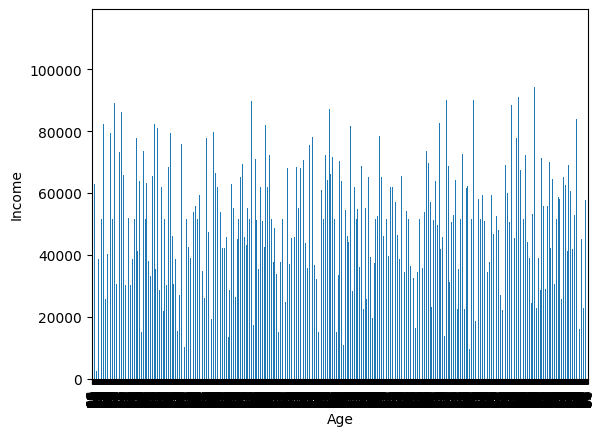

In [61]:
data.plot(kind='bar',x='Age',y='Income',legend=False)
plt.xlabel('Age')
plt.ylabel('Income')

<Axes: ylabel='Age'>

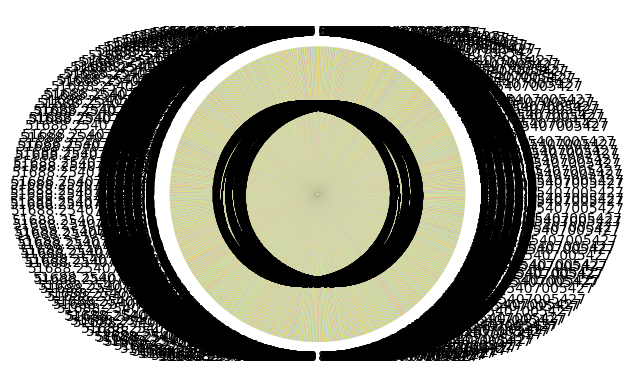

In [65]:
data.plot(kind='pie', y='Age', labels=data['Income'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'], legend=False)